# Airbnb data compared with Seattle and Boston

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Data Understanding

In [4]:
#Fisrt sheet called calendar
calendar_seattle = pd.read_csv('./calendar.csv')
calendar_boston = pd.read_csv('./calendar_boston.csv')
calendar_seattle.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
# Second sheet called listing 
df_seattle = pd.read_csv('./listings.csv')
df_boston = pd.read_csv('./listings_boston.csv')
df_seattle.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


## Data Preparation

In [6]:
# Drop the missing data in price column
calendar_seattle = calendar_seattle.dropna(subset = ['price'], axis = 0)
calendar_boston = calendar_boston.dropna(subset = ['price'], axis = 0)
#Change the data column to timeseries
calendar_seattle.date = pd.to_datetime(calendar_seattle.date)
calendar_boston.date = pd.to_datetime(calendar_boston.date)
#Change the price column to float
calendar_seattle['price'] = calendar_seattle.price.str.slice(start = 1).str.replace(',','').astype('float')
calendar_boston['price'] = calendar_boston.price.str.slice(start = 1).str.replace(',','').astype('float')

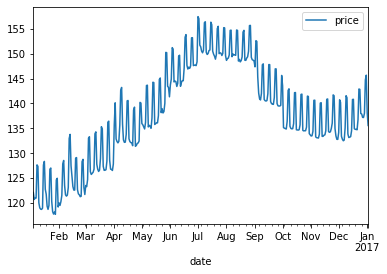

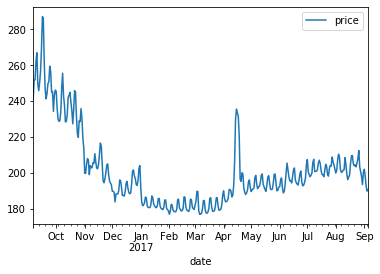

In [7]:
calendar_sea_meanbydate = calendar_seattle.groupby(['date']).mean()
calendar_bos_meanbydate = calendar_boston.groupby(['date']).mean()
calendar_sea_meanbydate[['price']].plot(kind = 'line')
calendar_bos_meanbydate[['price']].plot(kind = 'line')

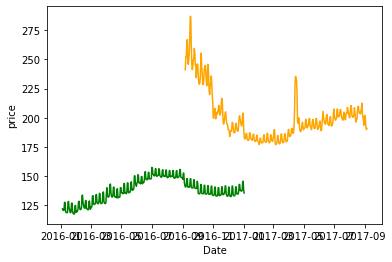

In [11]:
plt.plot(calendar_sea_meanbydate[['price']], color = 'g')
plt.plot(calendar_bos_meanbydate[['price']], color = 'orange')
plt.xlabel('Date')
plt.ylabel('price')
plt.show()

## Data Modeling

## Results Evaluating